# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
#from scipy.stats import linregress
import json

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

## Import API key
from api_keys import weather_api_key

# under VBA add this line to .iginore to gnore the push/ modification of the config.py file
# api_keys.py

In [3]:
# Output File CSV
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations-- numpy, generate 1500 lats, lngs a piece
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

In [5]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# the url info
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

In [7]:
# url Query build
Q_url = f"{url}appid={weather_api_key}&units={units}&q="
## url = f"http://api.openweathermap.org/data/2.5/weather?units-imperial&APPID={weather_api_key}"

In [8]:
# Get city weather data
weather_response = requests.get(Q_url + city)
weather_json = weather_response.json()
# converts a Python object into a json string-- dumps
print(json.dumps(weather_json, indent=6))
#print(weather_json)

{
      "coord": {
            "lon": -70.9167,
            "lat": -53.15
      },
      "weather": [
            {
                  "id": 801,
                  "main": "Clouds",
                  "description": "few clouds",
                  "icon": "02n"
            }
      ],
      "base": "stations",
      "main": {
            "temp": 7.06,
            "feels_like": 3.1,
            "temp_min": 7.06,
            "temp_max": 7.84,
            "pressure": 995,
            "humidity": 81
      },
      "visibility": 10000,
      "wind": {
            "speed": 7.2,
            "deg": 270
      },
      "clouds": {
            "all": 20
      },
      "dt": 1646456706,
      "sys": {
            "type": 1,
            "id": 8487,
            "country": "CL",
            "sunrise": 1646475447,
            "sunset": 1646523190
      },
      "timezone": -10800,
      "id": 3874787,
      "name": "Punta Arenas",
      "cod": 200
}


In [9]:
# set empty for list of variables
city_name = []
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

# start record counting
processing_record = 1 

# check if responsw correct
print(weather_response)
#print(cities)

<Response [200]>


In [10]:
# data retrive process start

# print to logger
print(f"Beginning Data Retrieval      ")
print(f"------------------------------")

# Loop through each city
for city in cities:
    
    # try to get the response for each city
    try:
        #run API requests and retrive the data
        response = requests.get(Q_url + city).json()
        
        ## add a time delay to avoid blowing out the API key
        #time.sleep(1)
        
        city_name.append(response["name"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        temperature.append(response["main"]["temp"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        city_record = response["name"]
        print(f"Processing Record {processing_record} | {city_record}")
        
        # increase record counting by 1
        processing_record += 1
        
    except:
        print("City not found. Skipping...") 
    pass

print(f"------------------------------")
print(f"Data Retrieval Complete!!    ")
print(f"------------------------------")

Beginning Data Retrieval      
------------------------------
Processing Record 1 | Chui
Processing Record 2 | Provideniya
Processing Record 3 | Saint-Philippe
Processing Record 4 | Qaanaaq
Processing Record 5 | Castro
Processing Record 6 | Khatanga
Processing Record 7 | Bambous Virieux
Processing Record 8 | Cidreira
Processing Record 9 | Chiang Khong
Processing Record 10 | Ponta do Sol
Processing Record 11 | Kohlu
Processing Record 12 | Japura
City not found. Skipping...
Processing Record 13 | Avarua
Processing Record 14 | Phuthaditjhaba
Processing Record 15 | Mataura
Processing Record 16 | Verkhoyansk
Processing Record 17 | Iquitos
Processing Record 18 | Ushuaia
Processing Record 19 | Butaritari
Processing Record 20 | Isangel
Processing Record 21 | Hobart
Processing Record 22 | Barrow
Processing Record 23 | Makkah al Mukarramah
Processing Record 24 | Iqaluit
Processing Record 25 | Alofi
Processing Record 26 | George Town
Processing Record 27 | Leningradskiy
City not found. Skipping..

Processing Record 228 | Skibbereen
Processing Record 229 | Atasū
City not found. Skipping...
City not found. Skipping...
Processing Record 230 | Turaif
Processing Record 231 | Vostok
Processing Record 232 | Hofn
Processing Record 233 | Oodweyne
Processing Record 234 | Dubbo
Processing Record 235 | Raymond
Processing Record 236 | Pemangkat
Processing Record 237 | Presidencia Roque Sáenz Peña
Processing Record 238 | Gamba
Processing Record 239 | Bandarbeyla
Processing Record 240 | Cherskiy
Processing Record 241 | Astara
Processing Record 242 | Inírida
Processing Record 243 | Tuatapere
Processing Record 244 | Oktyabr'skiy
Processing Record 245 | Cartagena
Processing Record 246 | Kaitangata
Processing Record 247 | Hamilton
Processing Record 248 | Thanh Hoa
Processing Record 249 | Hasaki
Processing Record 250 | Sakaraha
Processing Record 251 | Mumford
Processing Record 252 | Dingle
City not found. Skipping...
Processing Record 253 | Shenjiamen
Processing Record 254 | Honningsvåg
Processing 

Processing Record 450 | Ambulu
Processing Record 451 | Anadyr
Processing Record 452 | Manggar
Processing Record 453 | Usinsk
Processing Record 454 | Havøysund
Processing Record 455 | Quatre Cocos
Processing Record 456 | Killam
Processing Record 457 | Bārmer
Processing Record 458 | Rochegda
Processing Record 459 | Palmer
Processing Record 460 | Nakonde
Processing Record 461 | Mangit
Processing Record 462 | Seymchan
Processing Record 463 | Mabama
Processing Record 464 | Waipawa
Processing Record 465 | Ixtapa
Processing Record 466 | Takoradze
Processing Record 467 | Chimbote
Processing Record 468 | Apastovo
Processing Record 469 | Kismayo
Processing Record 470 | Zorritos
Processing Record 471 | Umluj
Processing Record 472 | Savannah Bight
Processing Record 473 | Diu
City not found. Skipping...
Processing Record 474 | Letlhakeng
Processing Record 475 | Xinqing
City not found. Skipping...
Processing Record 476 | Iskateley
Processing Record 477 | Vestmannaeyjar
Processing Record 478 | Along


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
# define dataframe then display
weather_data = {
    "City": city_name,
    "Latitude": latitude,
    "Longitude": longitude,
    "Temp": temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}
weatherDF = pd.DataFrame(weather_data)

weatherDF.head()

,City,Latitude,Longitude,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chui,-33.6971,-53.4616,21.85,94,95,2.54,UY,1646456784
1,Provideniya,64.3833,-173.3000,-8.95,84,100,1.97,RU,1646456784
2,Saint-Philippe,-21.3585,55.7679,27.77,86,100,6.07,RE,1646456785
3,Qaanaaq,77.4840,-69.3632,-17.59,67,0,3.25,GL,1646456785
4,Castro,-24.7911,-50.0119,17.13,94,100,1.02,BR,1646456786


In [26]:
# export data to CSV file
weatherDF.to_csv("Weather_Output.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [24]:
#Lat	Lng	Max Temp	Humidity	Cloudiness	Wind Speed	Date
# count	550.000000	550.000000	550.000000	550.000000	550.000000	550.000000	5.500000e+02# 
# Get the indices of cities that have humidity over 100%.
weatherDF.describe()

,Latitude,Longitude,Temp,Humidity,Cloudiness,Wind Speed,Date
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,5.550000e+02
mean,19.182270,23.676392,11.209532,73.016216,59.969369,3.435550,1.646457e+09
std,34.544885,91.181774,16.449621,22.208759,38.502625,2.621508,1.239334e+02
min,-54.800000,-179.166700,-31.620000,7.000000,0.000000,0.000000,1.646456e+09
25%,-9.075450,-57.369300,-1.790000,65.000000,20.000000,1.540000,1.646457e+09
50%,21.116700,28.583300,17.120000,79.000000,72.000000,2.870000,1.646457e+09
75%,49.696750,106.478450,24.510000,90.000000,99.000000,4.610000,1.646457e+09
max,78.218600,178.416700,39.870000,100.000000,100.000000,21.000000,1.646457e+09


In [27]:
# Get the indices of cities that have humidity over 100%.
extr_humidity = weatherDF[(weatherDF['Humidity']>100)].index
extr_humidity

Int64Index([], dtype='int64')

In [28]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# City	Lat	Lng	Max Temp	Humidity	Cloudiness	Wind Speed	Country	Date
# 0	butaritari	3.07	172.79	83.32	74	84	10.42	KI	1593605283

In [32]:
clean_city_data = weatherDF.drop(extr_humidity, inplace=False)
clean_city_data.head()

,City,Latitude,Longitude,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chui,-33.6971,-53.4616,21.85,94,95,2.54,UY,1646456784
1,Provideniya,64.3833,-173.3000,-8.95,84,100,1.97,RU,1646456784
2,Saint-Philippe,-21.3585,55.7679,27.77,86,100,6.07,RE,1646456785
3,Qaanaaq,77.4840,-69.3632,-17.59,67,0,3.25,GL,1646456785
4,Castro,-24.7911,-50.0119,17.13,94,100,1.02,BR,1646456786


In [33]:
# make a copy of the city_data DataFrame "clean_city_data" and export data to CSV file
clean_city_data.to_csv("clean_city_data.csv")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [34]:
## Create a series of scatter plots to showcase the following relationships:
#  Temperature (F) vs. Latitude
#  Humidity (%) vs. Latitude
#  Cloudiness (%) vs. Latitude
#  Wind Speed (mph) vs. Latitude

In [35]:
## Save plot to the selected directory. If the directory does not exist, it is created.

#import os
#import matplotlib.pyplot as plt

#script_dir = os.path.dirname(__file__)
#results_dir = os.path.join(script_dir, 'Results/')
#plot_file_name = "CityLatitude_vs_Temperature"

#if not os.path.isdir(results_dir):
#    os.makedirs(results_dir)

#plt.plot([1,2,3,4])
#plt.ylabel('some numbers')
#plt.savefig(results_dir + sample_file_name)

## Latitude vs. Temperature Plot

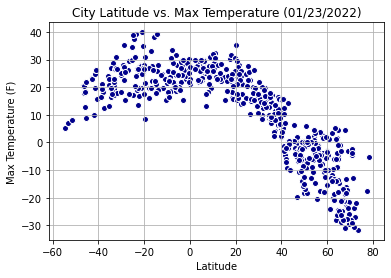

The relationship between City Latitude and Temperature shows as the scatter plot above. 

All latitude lines are parallel from East to West as circles to the equator, 
Temperature is inversely related to latitude.  
As latitude increases, the temperature falls, and vice versa. 



In [36]:
# Create a scatter plot for Temperature (F) vs. Latitude
plt.scatter(weatherDF['Latitude'], weatherDF["Temp"], facecolors = "darkblue", edgecolor ="white", marker="o")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (01/23/2022)")

# save plot as png file before show
plt.savefig("CityLatitude_vs_Temp.png")

plt.grid()
plt.show()

# bold print '\033[1m'+ words +'\033[0m'
print('\033[1m' +"The relationship between City Latitude and Temperature shows as the scatter plot above. \n" 
      "\n"
      "All latitude lines are parallel from East to West as circles to the equator, \n"
      "Temperature is inversely related to latitude.  \n"
      "As latitude increases, the temperature falls, and vice versa. \n"+'\033[0m')

## Latitude vs. Humidity Plot

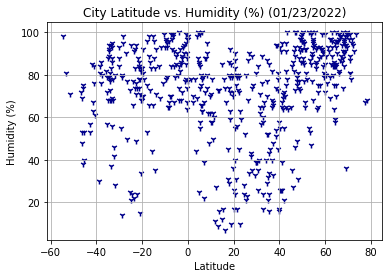

The relationship between City Latitude and Humidity shows as the scatter plot above. 
Since the humidity also meansures water vapor in the air, warm air can possess more water vapor (moisture)
then cold air, air will have a higher relative humidity if the air is cooler. The cities with higer Latitude 
will be moisture with the same amount of absolute/specific humidity, then the cities with lower latitude.



In [37]:
# Create a scatter plot for Humidity (%) vs. Latitude

plt.scatter(weatherDF["Latitude"], weatherDF["Humidity"], facecolors = "darkblue", edgecolor ="white", marker="1")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (%) (01/23/2022)")

# save plot as png file
plt.savefig("CityLatitude_vs_Humidity.png")

plt.grid()
plt.show()

# bold print '\033[1m'+ words +'\033[0m'
print('\033[1m' +"The relationship between City Latitude and Humidity shows as the scatter plot above. \n" 
      "Since the humidity also meansures water vapor in the air, warm air can possess more water vapor (moisture)\n"
      "then cold air, air will have a higher relative humidity if the air is cooler. The cities with higer Latitude \n"
      "will be moisture with the same amount of absolute/specific humidity, then the cities with lower latitude.\n"
      +'\033[0m')

## Latitude vs. Cloudiness Plot

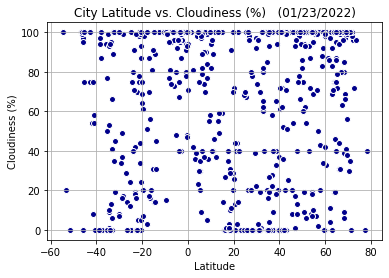

The relationship between City Latitude and Cloudiness (%) shows as the scatter plot above. 
Clouds tend to form in abundance in the middle latitudes to north and south of the equator.
There are three broad bands where Earth’s skies are most likely to be cloudy. 



In [38]:
# Create a scatter plot for Cloudiness (%) vs. Latitude

plt.scatter(weatherDF["Latitude"], weatherDF["Cloudiness"], facecolors = "darkblue", edgecolor ="white", marker="o")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (%)   (01/23/2022)")

# save plot as png file before show
plt.savefig("CityLatitude_vs_Cloudiness.png")

plt.grid()
plt.show()

# bold print '\033[1m'+ words +'\033[0m'
print('\033[1m' +
      "The relationship between City Latitude and Cloudiness (%) shows as the scatter plot above. \n" 
      "Clouds tend to form in abundance in the middle latitudes to north and south of the equator.\n"
      "There are three broad bands where Earth’s skies are most likely to be cloudy. \n"
      +'\033[0m')

## Latitude vs. Wind Speed Plot

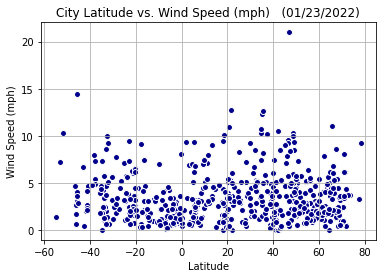

The relationship between City Latitude and Wind Speed (mph) shows as the scatter plot above. 
the speed of wind is determined by the magnitude of the air pressure difference make the air move 
from high pressure to low.  with greater speeds resulting from greater air pressure differences.
Observations show that the wind speed increases equatorward in low latitudes while the wind speed decreases. 



In [39]:
#Create a scatter plot for Wind Speed (mph) vs. Latitude

plt.scatter(weatherDF["Latitude"], weatherDF["Wind Speed"], facecolors = "darkblue", edgecolor ="white", marker="o")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (mph)   (01/23/2022)")

# save plot as png file
plt.savefig("CityLatitude_vs_WindSpeed.png")

plt.grid()
plt.show()

# bold print '\033[1m'+ words +'\033[0m'
print('\033[1m' +
      "The relationship between City Latitude and Wind Speed (mph) shows as the scatter plot above. \n" 
      "the speed of wind is determined by the magnitude of the air pressure difference make the air move \n"
      "from high pressure to low.  with greater speeds resulting from greater air pressure differences.\n"
      "Observations show that the wind speed increases equatorward in low latitudes while the wind speed decreases. \n"
      +'\033[0m')

## Linear Regression

In [50]:
# Separate the plots into Northern Hemisphere (>=0 degrees latitude) and Southern Hemisphere (<0 degrees latitude):

#Northern Hemisphere - Temperature (F) vs. Latitude
#Southern Hemisphere - Temperature (F) vs. Latitude
#Northern Hemisphere - Humidity (%) vs. Latitude
#Southern Hemisphere - Humidity (%) vs. Latitude
#Northern Hemisphere - Cloudiness (%) vs. Latitude
#Southern Hemisphere - Cloudiness (%) vs. Latitude
#Northern Hemisphere - Wind Speed (mph) vs. Latitude
#Southern Hemisphere - Wind Speed (mph) vs. Latitude

# explain what the linear regression is modeling. Describe any relationships and any other analysis

#final notebook must:
# Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
# Perform a weather check on each of the cities using a series of successive API calls.
# Include a print log of each city as it's being processed with the city number and city name.
# Save a CSV of all retrieved data and a PNG image for each scatter plot.

def linear_regression_plot(x_values, y_values, variable, equation_coordinates):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

    # Plot scatter plot
    plt.scatter(x_values, y_values)
    
    # Plot regression line
    plt.plot(x_values, regress_values, 'r-')
    plt.annotate(line_eq, equation_coordinates, fontsize=15, color='red')
    
    # Label plot
    plt.xlabel('Latitude')
    plt.ylabel(variable)
    
    # Print r-squared value
    print(f'The r-squared value is: {rvalue**2}')
    
    # Show plot
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

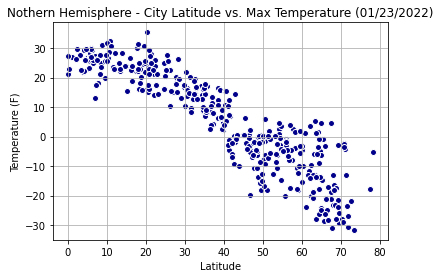

In [51]:
# create dataframe for northern hemisphere
N_hemisphere = weatherDF.loc[weatherDF["Latitude"] >= 0]

# Create a scatter plot for latitude vs temperature for northern hemisphere
x_values = N_hemisphere["Latitude"]
y_values = N_hemisphere["Temp"]
plt.scatter(x_values, y_values, facecolors="darkblue", marker="o", edgecolor="white")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title("Nothern Hemisphere - City Latitude vs. Max Temperature (01/23/2022)")

plt.grid()
plt.show()

In [52]:
# Perform a linear regression on Max temperature vs. latitude for Northern hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# caculate regression values
regress_values = x_values * slope + intercept
print(regress_values)

1     -12.796863
3     -22.345319
5     -18.324030
8      19.361491
9      10.319805
         ...    
548    -9.638534
549    31.640950
550    27.945385
552    10.589990
553    28.747631
Name: Latitude, Length: 369, dtype: float64


In [53]:
# result of line equation string
line_equation = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_equation)

y = -0.73x +34.13


The r-value is: 0.8208500770805531


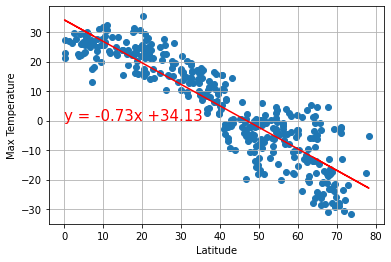

In [54]:
# Create plot for Northern hemisphere
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

#plt.text(1,1,line_equation, color='red')
plt.annotate(line_equation,(0,0),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# save plot as png file
plt.savefig("N_hemisphere_CityLatitude_vs_Temp.png")

plt.grid()
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.8208500770805531


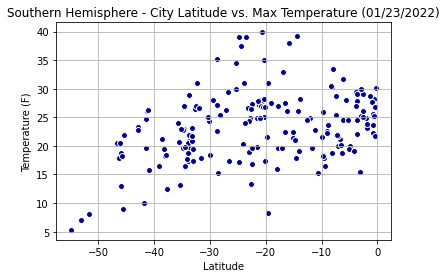

In [55]:
# create dataframe for Southern Hemisphere
S_hemisphere = weatherDF.loc[weatherDF["Latitude"] < 0]

# Create a scatter plot for latitude vs temperature for northern hemisphere
x_values = S_hemisphere["Latitude"]
y_values = S_hemisphere["Temp"]
plt.scatter(x_values, y_values, facecolors="darkblue", marker="o", edgecolor="white")
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title("Southern Hemisphere - City Latitude vs. Max Temperature (01/23/2022)")

#plt.plot(x_values,regress_values,"r-")
#plt.annotate(line_equation,(0,0),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# save plot as png file
plt.savefig("S_hemisphere_CityLat_vs_Temp.png")

plt.grid()
plt.show()

In [56]:
# Perform a linear regression on Max temperature vs. latitude for Southern hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# caculate regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      21.407438
2      23.316860
4      22.785658
6      23.474041
7      21.951546
         ...    
530    21.352408
543    26.547553
547    21.677805
551    25.817589
554    21.486950
Name: Latitude, Length: 186, dtype: float64


In [57]:
# result of line equation string
line_equation1 = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_equation1)

y = 0.15x +26.62


The r-value is: 0.126191257592118


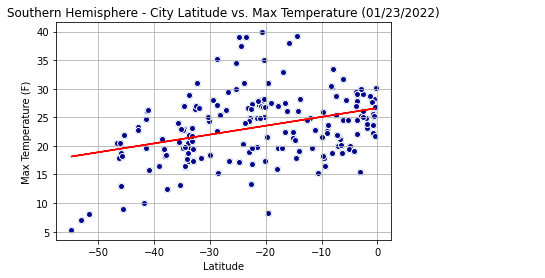

In [58]:
# Create plot for Southern Hemisphere
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel("Latitude")
plt.ylabel("Max Tempe")

plt.scatter(x_values, y_values, facecolors="darkblue", marker="o", edgecolor="white")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title("Southern Hemisphere - City Latitude vs. Max Temperature (01/23/2022)")

#plt.text(0,0,line_equation1, color='red')
plt.annotate({line_equation1},(0,0),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# save plot as png file
plt.savefig("S_Hemi_CityLatitude_vs_MaxTemp_LinearReg")

plt.grid()
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression